In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read in data

In [2]:
df = pd.read_csv("train.csv", parse_dates=True, index_col=0)
Xtest2 = pd.read_csv("test.csv", parse_dates=True, index_col=0)

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather -  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Basic EDA

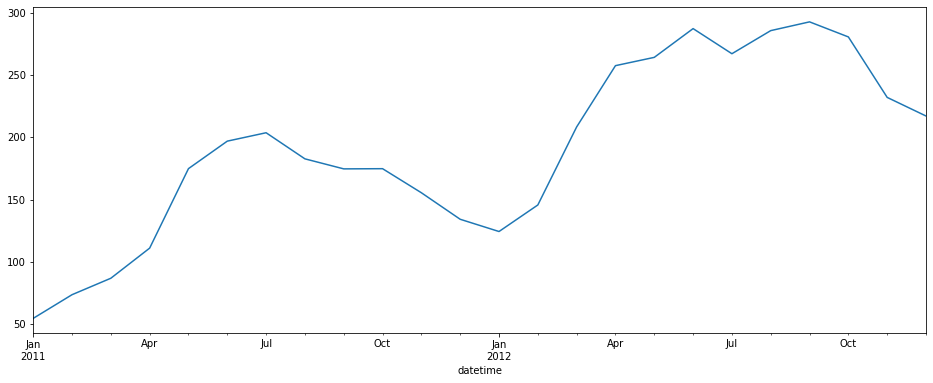

In [5]:
resampled = df.resample("M").mean()
resampled["count"].plot(figsize=(16, 6))

In [6]:
# last days of every month missing
df.index.day[400:500]

Int64Index([18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
            19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,  1,  1,  1,
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
             1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
             2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
             3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
           dtype='int64', name='datetime')

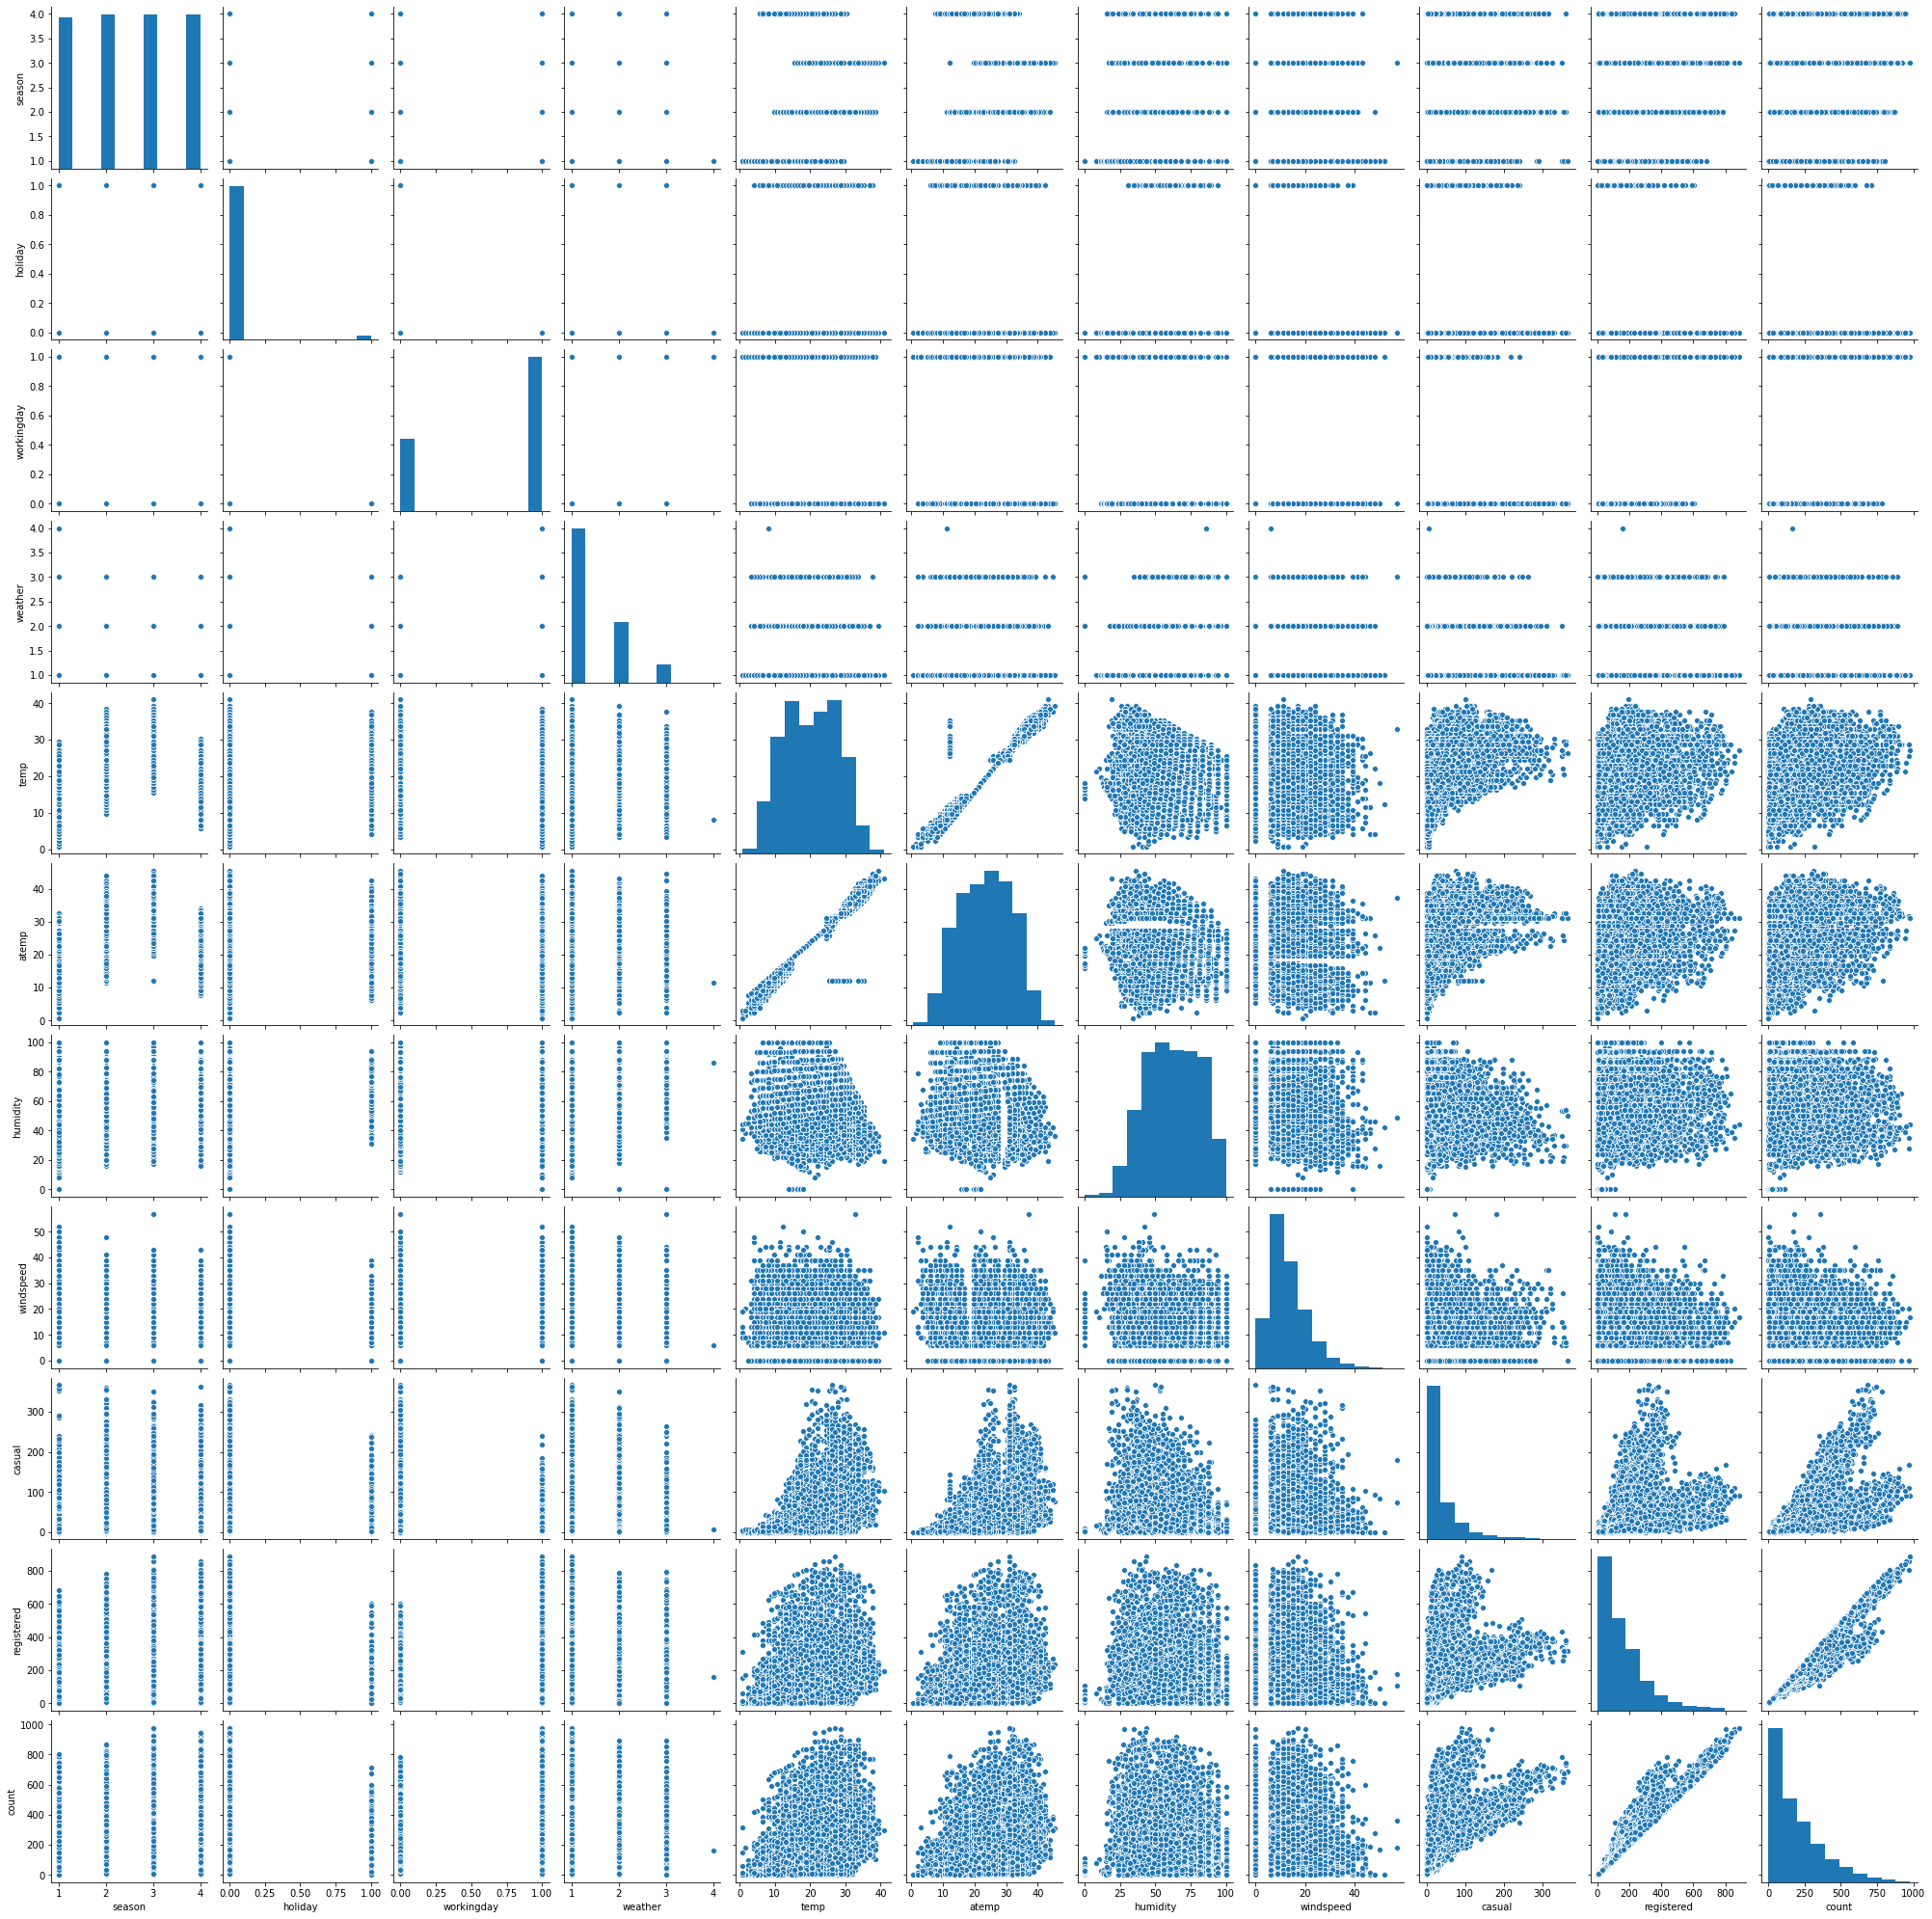

In [7]:
# shape of data
sns.pairplot(df)

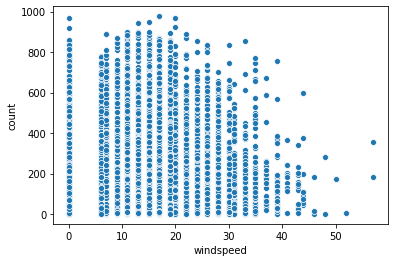

In [8]:
sns.scatterplot(x="windspeed", y="count", data=df)

two outliers for windspeed > 50, no values for windspeed between 0 and ~5

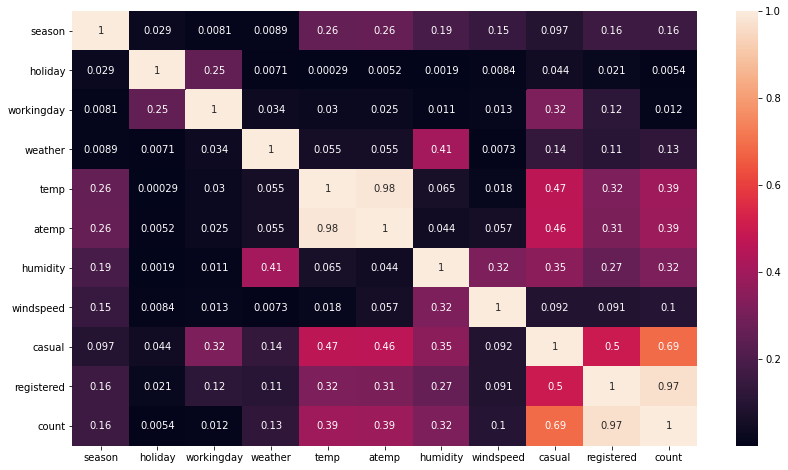

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr().abs(), annot=True)

(              count
 datetime           
 0         55.138462
 1         33.859031
 2         22.899554
 3         11.757506
 4          6.407240,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe39670b3a0>)

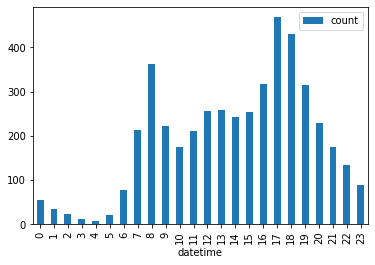

In [10]:
hour = df[["count"]].groupby(df.index.hour).mean()
hour.head(), hour.plot.bar()

(               count
 datetime            
 0         190.390716
 1         189.723847
 2         188.411348
 3         197.296201
 4         197.844343,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3969dacd0>)

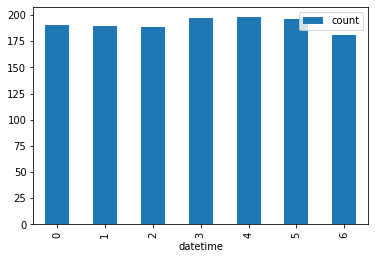

In [11]:
weekday = df[["count"]].groupby(df.index.weekday).mean()
weekday.head(), weekday.plot.bar()

two peaks at 8am and 5pm

(               count
 datetime            
 1          95.072948
 2          88.760606
 3          98.922078
 5         103.609195
 6         101.551515,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3969cea00>)

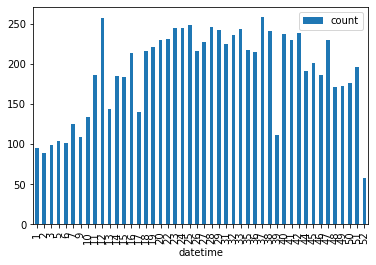

In [12]:
week = df[["count"]].groupby(df.index.week).mean()
week.head(), week.plot.bar()

(               count
 datetime            
 1          90.366516
 2         110.003330
 3         148.169811
 4         184.160616
 5         219.459430,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe39689bca0>)

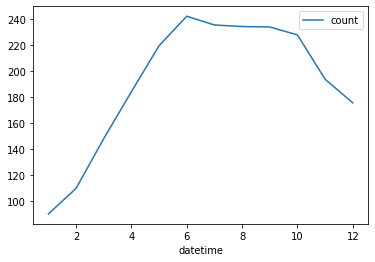

In [13]:
month = df[["count"]].groupby(df.index.month).mean()
month.head(), month.plot()

(               count
 datetime            
 2011      144.223349
 2012      238.560944,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe396694400>)

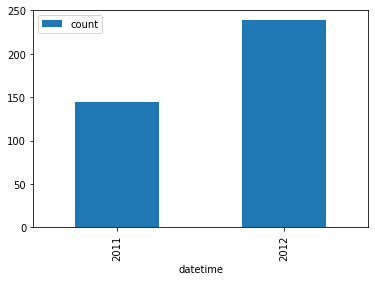

In [14]:
year = df[["count"]].groupby(df.index.year).mean()
year.head(), year.plot.bar()

(                   count
 temp                    
 (28.0, 41.0]  308.246542
 (23.0, 28.0]  224.393324
 (17.0, 23.0]  186.304057
 (13.0, 17.0]  164.068218
 (0.0, 13.0]    96.322324,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe396605460>)

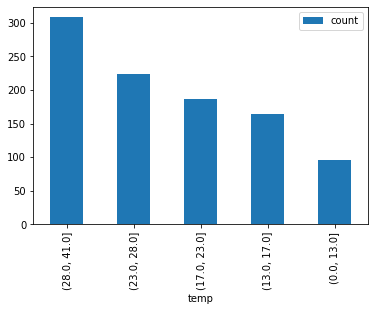

In [15]:
temp = (
    df[["count"]]
    .groupby(pd.qcut(df["temp"], q=5, precision=0))
    .mean()
    .sort_values(by="count", ascending=False)
)
temp, temp.plot.bar()

(                    count
 humidity                 
 (-1.0, 44.0]   276.324054
 (44.0, 56.0]   214.597333
 (56.0, 68.0]   197.880906
 (68.0, 81.0]   152.165825
 (81.0, 100.0]  109.964286,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3965ed9a0>)

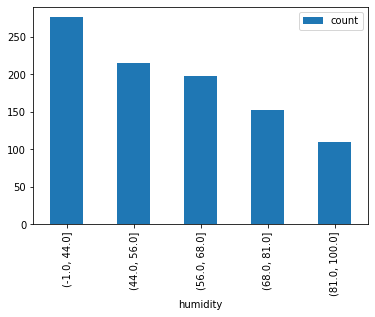

In [16]:
humidity = (
    df[["count"]]
    .groupby(pd.qcut(df["humidity"], q=5, precision=0))
    .mean()
    .sort_values(by="count", ascending=False)
)
humidity, humidity.plot.bar()

(                   count
 windspeed               
 (15.0, 19.0]  216.291333
 (19.0, 57.0]  211.916960
 (11.0, 15.0]  206.367948
 (6.0, 11.0]   182.541576
 (-1.0, 6.0]   155.818764,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3965428b0>)

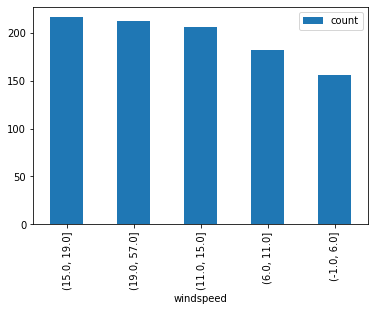

In [17]:
windspeed = (
    df[["count"]]
    .groupby(pd.qcut(df["windspeed"], q=5, precision=0))
    .mean()
    .sort_values(by="count", ascending=False)
)
windspeed, windspeed.plot.bar()

# Train test split

In [18]:
df["count_log"] = np.log(df["count"] + 1)
df["casual_log"] = np.log(df["casual"] + 1)
df["registered_log"] = np.log(df["registered"] + 1)

In [19]:
X = df
y = df["count"]

In [20]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

# Feature Engineering

In [21]:
df["hour"] = df.index.hour

Extraction from DatetimeIndex

In [22]:
def datetime_extract(df, feature):
    if feature == "hour":
        extract = df.index.hour
    elif feature == "day":
        extract = df.index.day
    elif feature == "weekday":
        extract = df.index.weekday
    elif feature == "weekend":
        extract = ((df.index.weekday == 5) | (df.index.weekday == 6)).astype(int)
    elif feature == "week":
        extract = df["week"] = np.abs(df.index.week - 26)
    elif feature == "month":
        extract = np.abs(df.index.month - 7)
    elif feature == "year":
        extract = df.index.year
    return extract

### Binning

In [23]:
def qcutting(df, col, q=5, labels=[0, 1, 2, 3, 4]):
    slices = pd.qcut(df[col], q=q, precision=0, labels=labels)
    bins = pd.get_dummies(slices)
    return pd.concat([df, bins], axis=1)

### One-Hot Encoding

In [24]:
def onehot(df, col):
    dummies = pd.get_dummies(df[col], prefix=col)
    return pd.concat([df, dummies], axis=1)

### Target Encoding

In [25]:
def target_encoding(df, col):
    """returns new target encoded column"""
    means = Xtrain.groupby(col)["count"].median()  # Calculate mean from training set
    return df[col].replace(means.to_dict())

### Polynomial

In [26]:
from sklearn.preprocessing import PolynomialFeatures  # transformative model


def poly_feat(df, cols):
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_poly = poly.fit_transform(df[cols])
    poly.get_feature_names()
    X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names())
    for i, col in enumerate(cols):
        X_poly_df.columns = X_poly_df.columns.str.replace(f"x{i}", col)
    X_poly_df = X_poly_df.drop(columns=cols).set_index(df.index)
    # X_poly_df = X_poly_df.drop(columns="1")
    return pd.concat([df, X_poly_df], axis=1)

In [27]:
from sklearn.preprocessing import MinMaxScaler


def min_max_scaling(df):
    minmax = MinMaxScaler()
    Xminmax = pd.DataFrame(minmax.fit_transform(df)).set_index(df.index)
    Xminmax = Xminmax.rename(
        columns={i: name for i, name in enumerate(df.columns.values)}
    )
    return Xminmax

### Final Featurization

Pick features

In [28]:
# extract
datetime_features = ["hour", "week", "weekday", "weekend", "month", "year"]
# binning
qcut_features = ["temp", "humidity", "windspeed"]
qcut_labels = [
    ["temp_0-13", "temp_13-17", "temp_17-23", "temp_23-28", "temp_28-41"],
    ["hum_0-44", "hum_44-56", "hum_56-68", "hum_68-81", "hum_81-100"],
    ["wind_0-6", "wind_6-11", "wind_11-15", "wind_15-19", "wind_19-57"],
]
# one-hot
oh_features = ["weather"]

# target encoding
tc_features = ["season"]

# polynomial / interaction terms
poly_features = []

In [29]:
def feature_engineering(df):
    for feat in datetime_features:
        df[feat] = datetime_extract(df, feat)
    for i, feat in enumerate(qcut_features):
        df = qcutting(df, feat, labels=qcut_labels[i])
    for feat in oh_features:
        df = onehot(df, feat)
    for feat in tc_features:
        df[f"{feat}_te"] = target_encoding(df, feat)
    # df = poly_feat(df, poly_features)
    return min_max_scaling(df)


Xtrain = feature_engineering(Xtrain)
Xtest = feature_engineering(Xtest)
Xtest2 = feature_engineering(Xtest2)

<ipython-input-29-ecc3feb5acb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat] = datetime_extract(df, feat)
<ipython-input-22-0c9a67fa3378>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract = df['week'] = np.abs(df.index.week - 26)
<ipython-input-29-ecc3feb5acb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [30]:
def hours(df, feature):
    if feature == "hour_workingday":
        df["hour_temp"] = df.index.hour
        df["hour_workingday"] = 0
        df.loc[((df["hour_temp"] == 8) | (df["hour_temp"] == 18) | (df["hour_temp"] == 17) ), "hour_workingday"] = 1
        return
    elif feature == "hour_weekend":
        df["hour_temp"] = df.index.hour
        df["hour_weekend"] = 0
        df.loc[((10 <= df["hour_temp"]) | (df["hour_temp"] <= 19)), "hour_weekend"] = 1

In [31]:
hours(Xtrain, "hour_workingday")
hours(Xtest, "hour_workingday")
hours(Xtest2, "hour_workingday")

hours(Xtrain, "hour_weekend")
hours(Xtest, "hour_weekend")
hours(Xtest2, "hour_weekend")

In [32]:
Xtrain.shape, ytrain.shape

((8164, 43), (8164,))

In [33]:
Xtrain.columns.values

array(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count',
       'count_log', 'casual_log', 'registered_log', 'hour', 'week',
       'weekday', 'weekend', 'month', 'year', 'temp_0-13', 'temp_13-17',
       'temp_17-23', 'temp_23-28', 'temp_28-41', 'hum_0-44', 'hum_44-56',
       'hum_56-68', 'hum_68-81', 'hum_81-100', 'wind_0-6', 'wind_6-11',
       'wind_11-15', 'wind_15-19', 'wind_19-57', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_te', 'hour_temp',
       'hour_workingday', 'hour_weekend'], dtype=object)

In [35]:
# make sure no one hot encoded col is missing in test set

test_sets = [Xtest, Xtest2]

for test_set in test_sets:
    # get missing columns in the training test
    missing_cols = set(Xtrain.columns) - set(test_set.columns)

    # add a missing column in test set with default value equal to 0
    for c in missing_cols:
        test_set[c] = 0

    # ensure the order of column in the test set is in the same order than in train set
    test_set = test_set[Xtrain.columns]

In [36]:
Xtest.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,wind_15-19,wind_19-57,weather_1,weather_2,weather_3,season_te,hour_temp,hour_workingday,hour_weekend,weather_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-09-05 11:00:00,0.666667,1.0,0.0,0.5,0.693878,0.741436,0.74,0.239149,0.279778,0.241540,...,0.0,0.0,0.0,1.0,0.0,0.739386,11,0,1,0
2012-03-18 04:00:00,0.000000,0.0,0.0,0.5,0.408163,0.465460,0.94,0.239149,0.016620,0.009335,...,0.0,0.0,0.0,1.0,0.0,0.000000,4,0,1,0
2012-10-14 17:00:00,1.000000,0.0,0.0,0.0,0.632653,0.689655,0.44,0.282552,0.534626,0.403734,...,0.0,0.0,1.0,0.0,0.0,1.000000,17,1,1,0


### Prepare data

In [37]:
features = [
    "season_te",
    "weather_1",
    "weather_2",
    "weather_3",
    "hour_workingday",
    "hour_weekend",
    "hour",
    "weekend",
    "year",
    "hum_44-56",
    "hum_56-68",
    "hum_68-81",
    "hum_81-100",
    "temp_0-13",
    "temp_13-17",
    "temp_17-23",
    "temp_23-28",
    "wind_0-6",
    "wind_6-11",
    "wind_11-15",
    "wind_19-57",
]

In [38]:
# list of reduced features
features = [
    "hour_workingday",
    "hour",
    "weekend",
    "weekday",
    "temp_0-13",
    "year",
    "season_te",
    "weather_3",
    "hum_81-100",
    "temp_13-17",
    "wind_6-11",
    "wind_19-57",
]

In [39]:
Xtrain = Xtrain[features]
Xtest = Xtest[features]
Xtest2 = Xtest2[features]

In [40]:
Xtrain.head()

,hour_workingday,hour,weekend,weekday,temp_0-13,year,season_te,weather_3,hum_81-100,temp_13-17,wind_6-11,wind_19-57
datetime,,,,,,,,,,,,
2012-10-06 00:00:00,0,0.000000,1.0,0.833333,0.0,1.0,0.716814,0.0,1.0,0.0,1.0,0.0
2012-05-02 21:00:00,0,0.913043,0.0,0.333333,0.0,1.0,0.769912,0.0,0.0,0.0,0.0,0.0
2012-12-02 09:00:00,0,0.391304,1.0,1.000000,1.0,1.0,0.716814,0.0,1.0,0.0,1.0,0.0
2011-07-17 05:00:00,0,0.217391,1.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
2012-01-09 17:00:00,1,0.739130,0.0,0.000000,1.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0


In [41]:
Xtrain.columns

Index(['hour_workingday', 'hour', 'weekend', 'weekday', 'temp_0-13', 'year',
       'season_te', 'weather_3', 'hum_81-100', 'temp_13-17', 'wind_6-11',
       'wind_19-57'],
      dtype='object')

# Models   
Linear Regression, Ridge, RandomForestRegressor, GradientBoostingRegressor

## Linear Regression Model

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


def score_rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred))

rmsle = make_scorer(score_rmsle)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_log_error


lr = LinearRegression()
lr.fit(Xtrain, np.log(ytrain + 1))
train_predict = lr.predict(Xtrain)
train_predict = np.exp(train_predict)
test_predict = lr.predict(Xtest)
test_predict = np.exp(test_predict)
lr.score(Xtrain, np.log(ytrain + 1))

0.517923038965476

In [92]:
print("train score :", score_rmsle(ytrain, train_predict))
print("test score  :", score_rmsle(ytest, test_predict))

train score : 0.9868812166105747
test score  : 0.9760446782394301


## Ridge

In [101]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(Xtrain, np.log(ytrain + 1))
train_predict = rr.predict(Xtrain)
train_predict = np.exp(train_predict)
test_predict = rr.predict(Xtest)
test_predict = np.exp(test_predict)

In [102]:
print("train score :", score_rmsle(ytrain, train_predict))
print("test score  :", score_rmsle(ytest, test_predict))

train score : 0.9868912099314598
test score  : 0.9760361059653999


## Random Forest Regressor (*best performing)

In [95]:
# Loss function: root mean squared log error (for kaggle submission)
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(Xtrain, ytrain)
train_predict = rfr.predict(Xtrain)
test_predict = rfr.predict(Xtest)

In [96]:
print("train score :", score_rmsle(ytrain, train_predict))
print("test score  :", score_rmsle(ytest, test_predict))

train score : 0.21618574083543932
test score  : 0.39327387143670645


Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


def score_rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred))


rmsle = make_scorer(score_rmsle)

scores_train = cross_val_score(rfr, Xtrain, ytrain, cv=5, scoring=rmsle)
print("train cv score : ", scores_train)
print("train cv score mean: ", scores_train.mean())
print("train cv score std: ", scores_train.std())
scores_test = cross_val_score(rfr, Xtest, ytest, cv=5, scoring=rmsle)
print("test cv score : ", scores_test)
print("test cv score mean: ", scores_test.mean())
print("test cv score std: ", scores_test.std())

train cv score :  [0.40196061 0.38419958 0.38246831 0.37979716 0.39823854]
train cv score mean:  0.3893328375351402
train cv score std:  0.008979681579182462
test cv score :  [0.4298446  0.36974461 0.42575567 0.40927329 0.41064138]
test cv score mean:  0.40905190905225364
test cv score std:  0.021255542345930148


GridSearch

In [51]:
from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={"n_estimators": [10, 50, 100, 500], "n_jobs": [-1]},
    scoring=rmsle,
)
gridcv.fit(Xtrain, ytrain)
pred = gridcv.predict(Xtest)

In [52]:
gridcv.best_estimator_

RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [53]:
# Look at the results
results = pd.DataFrame(gridcv.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.293662,0.488948,0.011670,0.005139,10,-1,"{'n_estimators': 10, 'n_jobs': -1}",0.409581,0.389384,0.395965,0.385626,0.405903,0.397292,0.009226,1
1,0.178409,0.015978,0.018710,0.003408,50,-1,"{'n_estimators': 50, 'n_jobs': -1}",0.402569,0.387810,0.383023,0.379138,0.400113,0.390531,0.009277,2
2,0.362111,0.034298,0.030014,0.004873,100,-1,"{'n_estimators': 100, 'n_jobs': -1}",0.401200,0.384500,0.383558,0.379680,0.400469,0.389881,0.009091,3
3,1.424797,0.053877,0.113379,0.008118,500,-1,"{'n_estimators': 500, 'n_jobs': -1}",0.400438,0.384457,0.383371,0.379948,0.399207,0.389484,0.008580,4


In [54]:
importance_features = pd.DataFrame(
    {"feature": Xtrain.columns, "importance": rfr.feature_importances_}
).sort_values(by="importance", ascending=False)
importance_features

,feature,importance
1,hour,0.478240
0,hour_workingday,0.126949
5,year,0.103669
6,season_te,0.085938
3,weekday,0.063665
2,weekend,0.041005
4,temp_0-13,0.030919
7,weather_3,0.019851
9,temp_13-17,0.018490
8,hum_81-100,0.016515


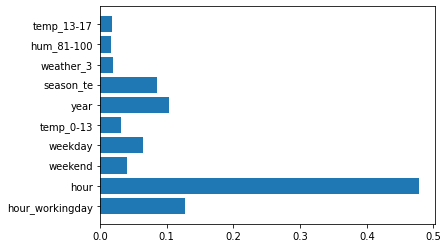

In [55]:
# plot horizontal bar chart for important features
plt.barh(range(10), rfr.feature_importances_[:10])
plt.yticks(range(10), features[:10])
None

In [56]:
# fit the model using statsmodels
from statsmodels.regression.linear_model import OLS

m_sm = OLS(ytrain, Xtrain)
result_sm = m_sm.fit()
result_sm.summary()  # P-value above 0.05 tells you that feature is not significant for your model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              2327.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:20:56   Log-Likelihood:                         -50960.
No. Observations:                8164   AIC:                                  1.019e+05
Df Residuals:                    8152   BIC:                                  1.020e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
hour_workingday   234.1660      4.226     55.413      0.000     225.882     242.450
hour              188.9159      4.222     44.744      0.000     180.639     197.192
weekend           -10.1676      4.863     -2.091      0.037     -19.700      -0.635
weekday            21.7418      6.349      3.425      0.001       9.297      34.187
temp_0-13         -74.1023      3.520    -21.054      0.000     -81.002     -67.203
year               89.6460      2.650     33.828      0.000      84.451      94.841
season_te          80.0980      3.508     22.834      0.000      73.222      86.974
weather_3         -57.9900      5.410    -10.719      0.000     -68.596     -47.385
hum_81-100        -56.3337      3.711    -15.181      0.000     -63.608     -49.059
temp_13-17        -40.9989      3.786    -10.830      0.000     -48.420     -33.578
wind_6-11          -2.0374      3.137     -0.649      0.516      -8.187       4.112
wind_19-57         14.3185      3.713      3.856      0.000       7.039      21.598
==============================================================================
Omnibus:                      373.964   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.553
Skew:                           0.502   Prob(JB):                     3.96e-98
Kurtosis:                       3.558   Cond. No.                         7.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SVR

In [97]:
from sklearn.svm import SVR


svr = SVR()
svr.fit(Xtrain, ytrain)
train_predict = svr.predict(Xtrain)
test_predict = svr.predict(Xtest)

In [98]:
print("train score :", np.sqrt(mean_squared_log_error(train_predict,ytrain)))
print("test score  :", np.sqrt(mean_squared_log_error(test_predict,ytest)))

train score : 1.0884953521719487
test score  : 1.0601612316235267


## Gradient Boosting Regressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
}

gb = GradientBoostingRegressor(**params)
gb.fit(Xtrain, np.log(ytrain + 1))
train_predict = gb.predict(Xtrain)
train_predict = np.exp(train_predict)
test_predict = gb.predict(Xtest)
test_predict = np.exp(test_predict)

In [60]:
print("train score :", np.sqrt(mean_squared_log_error(train_predict, ytrain)))
print("test score  :", np.sqrt(mean_squared_log_error(test_predict, ytest)))

train score : 0.41946839469957725
test score  : 0.43229544528889363


compare score

In [104]:
models = {
    "Linear Regression": {
        "train score": 0.9868812166105747,
        "test score": 0.9760446782394301,
    },
    "Ridge": {
        "train score": 0.9868912099314598, 
        "test score": 0.9760361059653999
    },
    "RandomForestRegressor": {
        "train score": 0.21618574083543932,
        "test score": 0.39327387143670645,
    },
    "SVR": {
        "train score": 1.0884953521719487, 
        "test score": 1.0601612316235267
    },
    "GradientBoostingRegressor": {
        "train score": 0.41946839469957725,
        "test score": 0.43229544528889363,
    },
}

pd.DataFrame(models).T

,train score,test score
Linear Regression,0.986881,0.976045
Ridge,0.986891,0.976036
RandomForestRegressor,0.216186,0.393274
SVR,1.088495,1.060161
GradientBoostingRegressor,0.419468,0.432295


# Train on full data set

In [61]:
X = pd.concat([Xtrain, Xtest])
y = pd.concat([ytrain, ytest])

In [72]:
# Train RandomForestRegressor on full data set
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)

rfr.fit(X, y)
rfr_ypred = rfr.predict(X)
rfr_kaggle_predict = rfr.predict(Xtest2)

In [73]:
print("rmsle score :", np.sqrt(mean_squared_log_error(rfr_ypred,y)))

rmsle score : 0.2166128711183687


In [74]:
# Train  GradientBoostingRegressor on full data set

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
}

gb = GradientBoostingRegressor(**params)
gb = GradientBoostingRegressor(**params)
gb.fit(X, np.log(y + 1))
gb_ypred = gb.predict(X)
gb_ypred = np.exp(gb_ypred)
gb_kaggle_predict = gb.predict(Xtest2)
gb_kaggle_predict = np.exp(gb_kaggle_predict)

In [75]:
print("rmsle score :", np.sqrt(mean_squared_log_error(gb_ypred,y)))

rmsle score : 0.42202285978111115


plotting predictions for RandomForest and GradientBoosting against ytrue

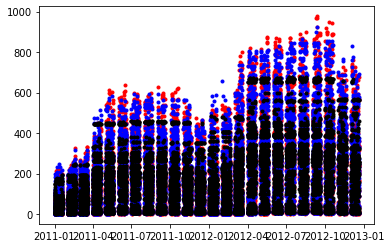

In [84]:
# red dots are actual numbers of bike rentals
plt.plot(
    y, "r."
)

# blues are predictions from RandomForest
plt.plot(
    pd.DataFrame(rfr_ypred).set_index(X.index), "b."
)

# blacks are predictions from GradientBoosting
plt.plot(
    pd.DataFrame(gb_ypred).set_index(X.index), "k."
)  

In [66]:
# combining predictions from different models

kaggle_predict = 0.3 * gb_kaggle_predict + 0.7 * rfr_kaggle_predict

### Save csv for submission

In [67]:
d = {"datetime": Xtest2.index, "count": kaggle_predict}
submission = pd.DataFrame(d)
submission.tail(5)

,datetime,count
6488,2012-12-31 19:00:00,156.609440
6489,2012-12-31 20:00:00,113.222739
6490,2012-12-31 21:00:00,102.967580
6491,2012-12-31 22:00:00,87.917405
6492,2012-12-31 23:00:00,45.740219


In [68]:
# saving to a csv file for predictions on kaggle.
submission.to_csv("submission.csv", index=False)

kaggle score = 0.45849